# Data on the Blockchain
In this report we look into how we can exract data from the blockchain

In [4]:
from dotenv import load_dotenv
import os
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("DUNE_API_KEY")
print(api_key)


H4CQhpfpXV6MORFhe6qySV3JwonVb2sp


C:\Users\shoge\AppData\Local\Temp\ipykernel_33896\3479322154.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Extracting Knowledge from Blockchain Networks


Dune Analytics offers a comprehensive and accessible platform for extracting and analyzing blockchain data. For our purpose, we are focusing on AAVE staking, utilizing the insights provided by the [AAVE Staking Dashboard created by KARTOD](https://dune.com/KARTOD/AAVE-Staking). This dashboard presents a rich set of data points including staking rewards, total value locked (TVL) in staking, number of stakers, and other relevant metrics.


In [16]:
stkAAVE_cumulative_stake = requests.get(f'https://api.dune.com/api/v1/query/155127/results?api_key={api_key}').json()

In [17]:
cum_stkAAVE_df = pd.DataFrame( stkAAVE_cumulative_stake['result']['rows'])
cum_stkAAVE_df.index = pd.to_datetime(cum_stkAAVE_df['day'])
cum_stkAAVE_df = cum_stkAAVE_df.sort_index()
print(cum_stkAAVE_df.head())


                           aave_price    aave_reward       apy   apy_now  \
day                                                                        
2022-01-17 00:00:00+00:00  231.241806  127182.993056  0.067288  6.728832   
2022-01-18 00:00:00+00:00  231.281736  127204.954861  0.066891  6.689135   
2022-01-19 00:00:00+00:00  220.059549  121032.751736  0.066883  6.688272   
2022-01-20 00:00:00+00:00  213.825937  117604.265625  0.066933  6.693310   
2022-01-21 00:00:00+00:00  186.292847  102461.065972  0.066961  6.696107   

                           cumulative_staked                          day  \
day                                                                         
2022-01-17 00:00:00+00:00       2.983430e+06  2022-01-17 00:00:00.000 UTC   
2022-01-18 00:00:00+00:00       3.001135e+06  2022-01-18 00:00:00.000 UTC   
2022-01-19 00:00:00+00:00       3.001523e+06  2022-01-19 00:00:00.000 UTC   
2022-01-20 00:00:00+00:00       2.999264e+06  2022-01-20 00:00:00.000 UTC   
2022-

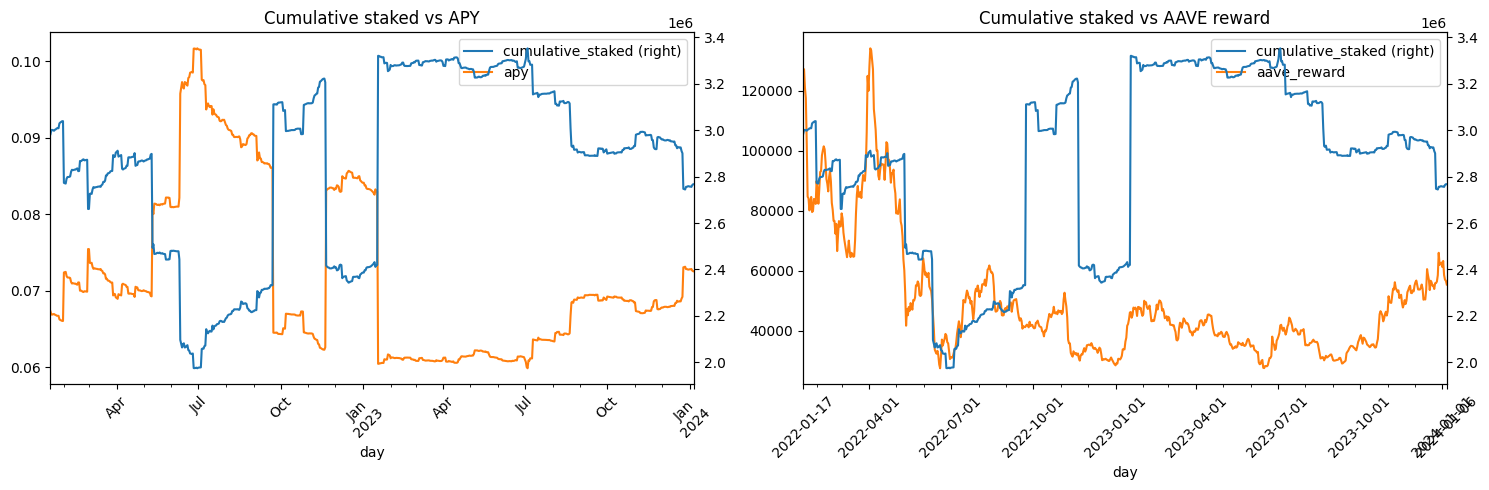

In [73]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

cum_stkAAVE_df[['cumulative_staked', 'apy']].plot(ax=axes[0], secondary_y=['cumulative_staked'])
axes[0].set_title('Cumulative staked vs APY')
axes[0].tick_params(axis='x', rotation=45)  # Rotate X axis labels
# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

cum_stkAAVE_df[['cumulative_staked', 'aave_reward']].plot(ax=axes[1], secondary_y=['cumulative_staked'])
axes[1].set_title('Cumulative staked vs AAVE reward')
axes[1].tick_params(axis='x', rotation=45)  # Rotate X axis labels
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()

## Observations
Correlation between staking and yield: There is an evident correlation between the amount staked and the yield, which is common in staking ecosystems. The more assets there are staked, the lower the yield becomes, assuming the total reward pool remains constant.


Impact of market events: The spikes and drops in the graph could be correlated with market events. It would be useful to overlay market price data for AAVE to see if these changes correspond with significant price movements.


Staking incentives: The relationship between staked amounts and rewards could indicate how incentives impact staker behavior. It’s important to analyze how changes in rewards impact staking and unstaking actions.
Seasonality and patterns: Are there patterns or seasonal behaviors in staking? For example, do users tend to stake/unstake during certain months?

In [101]:
aave_borrows = requests.get(f'https://api.dune.com/api/v1/query/1950532/results?api_key={api_key}').json()
aave_liquidations = requests.get(f'https://api.dune.com/api/v1/query/1955184/results?api_key={api_key}').json()


                           collateral_amount_usd                          day  \
day                                                                             
2024-01-01 00:00:00+00:00           1.480464e+07  2024-01-01 00:00:00.000 UTC   
2023-12-01 00:00:00+00:00           1.354127e+06  2023-12-01 00:00:00.000 UTC   
2023-11-01 00:00:00+00:00           1.672571e+06  2023-11-01 00:00:00.000 UTC   
2023-10-01 00:00:00+00:00           1.350399e+06  2023-10-01 00:00:00.000 UTC   
2023-09-01 00:00:00+00:00           3.317278e+05  2023-09-01 00:00:00.000 UTC   

                           debt_amount_usd  liquidations  liquidators  \
day                                                                     
2024-01-01 00:00:00+00:00     1.307331e+07            85           12   
2023-12-01 00:00:00+00:00     1.261099e+06            63            9   
2023-11-01 00:00:00+00:00     1.611094e+06            53           10   
2023-10-01 00:00:00+00:00     1.267491e+06            66           

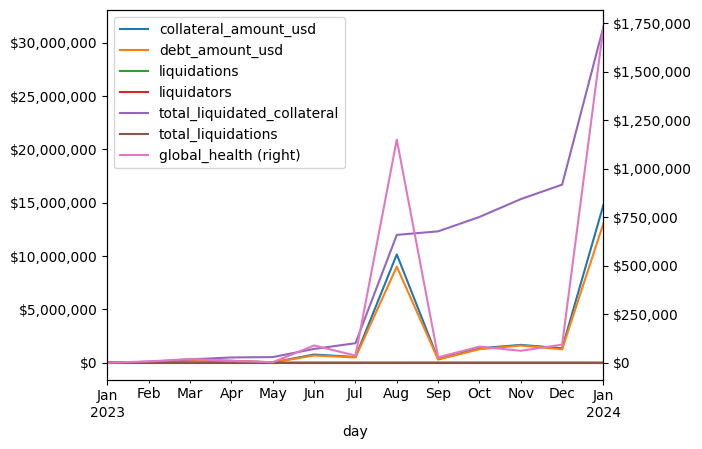

In [118]:
from matplotlib.ticker import FuncFormatter

def money_formatter(x, pos):
    return "${:,.0f}".format(x)



liquidations_df = pd.DataFrame( aave_liquidations['result']['rows'])
liquidations_df.index = pd.to_datetime(liquidations_df['day'])
liquidations_df['global_health'] = liquidations_df['collateral_amount_usd'] - liquidations_df['debt_amount_usd']
print(liquidations_df.head())

# Create the plot
fig, ax = plt.subplots()
liquidations_df.plot(ax=ax, secondary_y=['global_health'])

# Format the ticks as currency
formatter = FuncFormatter(money_formatter)
ax.yaxis.set_major_formatter(formatter)
ax.right_ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

                                    BTC  Total_Borrow_volume  Total_Borrowers  \
day                                                                             
2024-01-25 00:00:00+00:00  40083.569355         5.262724e+06               15   
2024-01-24 00:00:00+00:00  39941.872083         4.027724e+07              190   
2024-01-23 00:00:00+00:00  39449.042049         1.090044e+08              305   
2024-01-22 00:00:00+00:00  40778.036667         2.325099e+08              229   
2024-01-21 00:00:00+00:00  41750.648299         6.041893e+07              171   

                           Total_Borrows  Total_Depositors  Total_Deposits  \
day                                                                          
2024-01-25 00:00:00+00:00             16                29              34   
2024-01-24 00:00:00+00:00            232               271             363   
2024-01-23 00:00:00+00:00            390               494             698   
2024-01-22 00:00:00+00:00            297  

<Axes: xlabel='day'>

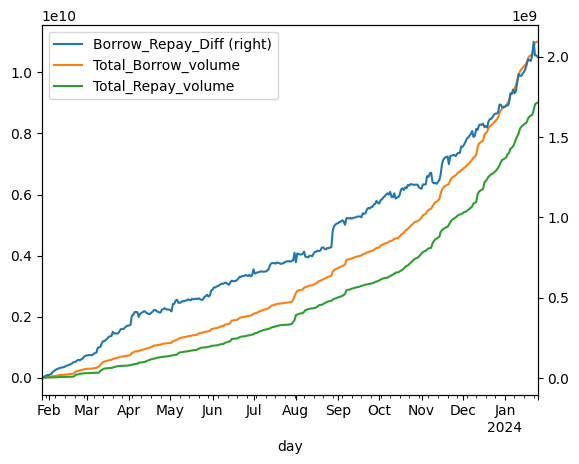

In [106]:
aave_raw_df = pd.DataFrame( aave_borrows['result']['rows'])
aave_raw_df.index = pd.to_datetime(aave_raw_df['day'])
print(aave_raw_df.head())
aave_raw_df = aave_raw_df.sort_index()[['Total_Borrow_volume', 'Total_Repay_volume', 'Total_Borrowers', 'Total_Repayers']]

# Calculate the cumulative difference between borrows and repays
aave_raw_df['Borrow_Repay_Diff'] = aave_raw_df['Total_Borrow_volume'] - aave_raw_df['Total_Repay_volume']
# aave_raw_df['Borrow_Repay_Diff'] = aave_raw_df['Borrow_Repay_Diff'].diff()

aave_cumulative_df = aave_raw_df[['Borrow_Repay_Diff','Total_Borrow_volume','Total_Repay_volume']].cumsum() 
aave_cumulative_df.plot(secondary_y='Borrow_Repay_Diff')


<Axes: xlabel='day'>

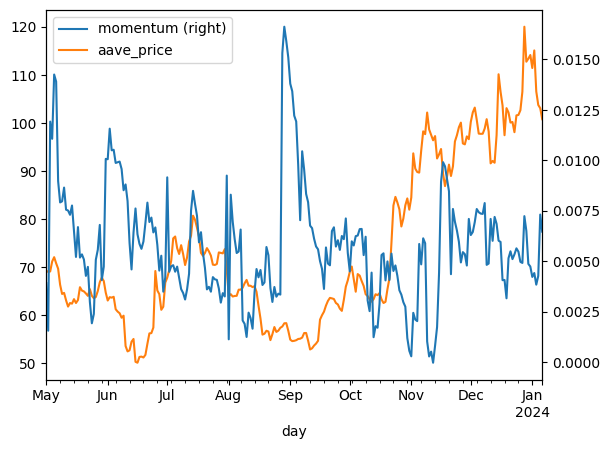

In [99]:

momentum = aave_cumulative_df['Borrow_Repay_Diff'].pct_change().ewm(span=20).mean()
momentum.name = 'momentum'
price_momentum = pd.merge(momentum, cum_stkAAVE_df['aave_price'], left_index=True, right_index=True)
price_momentum.loc['20230501':].plot(secondary_y='momentum')

